cd /mnt/c/Users/mksch/Desktop/Personal/GitHub/basegis
docker run -p 8888:8888 -p 8787:8787 -v $(pwd):/home/gisuser/code/ -it basegis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())             # Shows current working directory

/home/gisuser/code


In [3]:
print(os.listdir('/home/gisuser/code/code/data'))     # Lists files in /data, adjust path accordingly

['typology_grapgh_data.xlsx']


In [86]:
#Load your data from Excel
# Replace 'your_file.xlsx' with the actual filename
# Replace 'Time_Segment' with the actual column name that contains "TS", "90-95", etc.
df = pd.read_excel('/home/gisuser/code/code/data/typology_grapgh_data.xlsx', index_col=0)
if 'TS_km2' in df.columns:
    df = df.drop(columns=['TS_km2'])

In [65]:
print(df)
#print(df.index.tolist())


             90-95_km2  95-00_km2  00-05_km2  05-10_km2  10-15_km2  15-20_km2
Typology                                                                     
attrition        12763      13246      10750       9352      10356      10134
aggregation      74333      72910      69634      59582      57526      54343
shrinkage         8805       8971       8628       8662       9174      10102
perforation       2280       2063       2085       2122       1809       2067
deformation      13587      12834      13048      12359      11780      12011
shift           135173     138097     142475     146977     147269     157872
enlargement      15611      15316      17135      20379      19631      20752
dissection       24312      23357      20246      18722      19502      21041
frag per se      58138      55731      57278      60788      65394      60020
creation          9561       8595      11410      15018      14426      14081


/tmp/ipykernel_24/4205828411.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom = [bottom[i] + data[i] for i in range(len(data))]


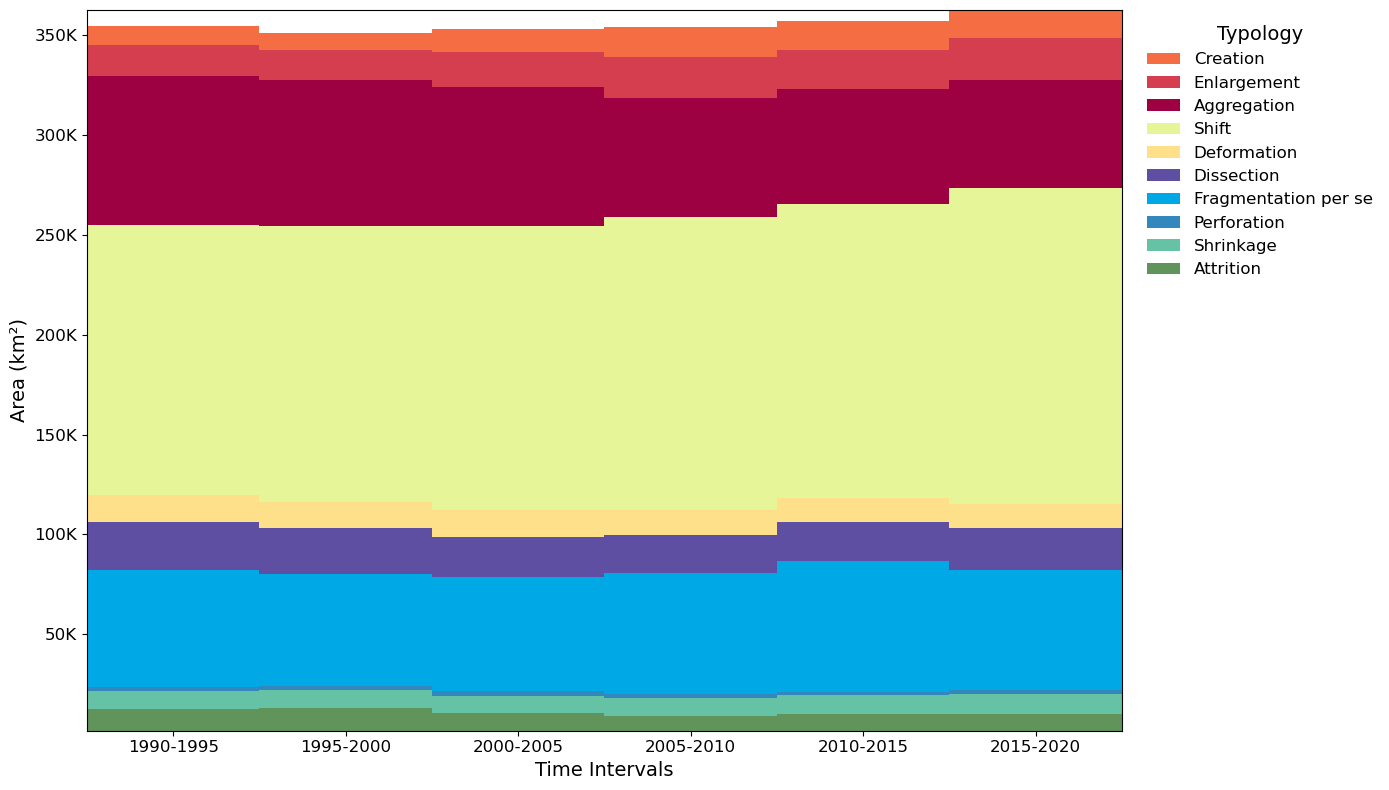

In [87]:
colors = {
    "aggregation": "#9E0142",
    "attrition": "#61945A",
    "creation": "#F46D43",
    "dissection": "#5E4FA2",
    "frag per se": "#00A9E6",
    "shrinkage": "#66C2A5",
    "perforation": "#3288BD",
    "enlargement": "#D53E4F",
    "shift": "#E6F598",
    "deformation": "#FEE08B"
}

legend_labels = {
    "aggregation": "Aggregation",
    "attrition": "Attrition",
    "creation": "Creation",
    "dissection": "Dissection",
    "frag per se": "Fragmentation per se",
    "shrinkage": "Shrinkage",
    "perforation": "Perforation",
    "enlargement": "Enlargement",
    "shift": "Shift",
    "deformation": "Deformation"
}

typology_order = [
    "attrition", "shrinkage", "perforation", "frag per se", "dissection",
    "deformation", "shift", 
    "aggregation", "enlargement", "creation", 
    
]

time_points = df.columns.tolist()

custom_x_labels = [
    "1990-1995", "1995-2000", "2000-2005",
    "2005-2010", "2010-2015", "2015-2020"
]

fig, ax = plt.subplots(figsize=(14, 8))

bottom = [0] * len(time_points)
for typ in typology_order:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(
            range(len(time_points)),
            data,
            bottom=bottom,
            color=colors.get(typ, "#cccccc"),
            edgecolor='none',
            width=1.0,
            label=legend_labels.get(typ, typ)
        )
        bottom = [bottom[i] + data[i] for i in range(len(data))]

ax.set_xlabel('Time Intervals', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(df.values.min(), df.sum().max())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
#ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0)
# Create legend in typology_order



ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', reverse=True, frameon=False, fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


/tmp/ipykernel_24/1140385656.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom = [bottom[i] + data[i] for i in range(len(data))]


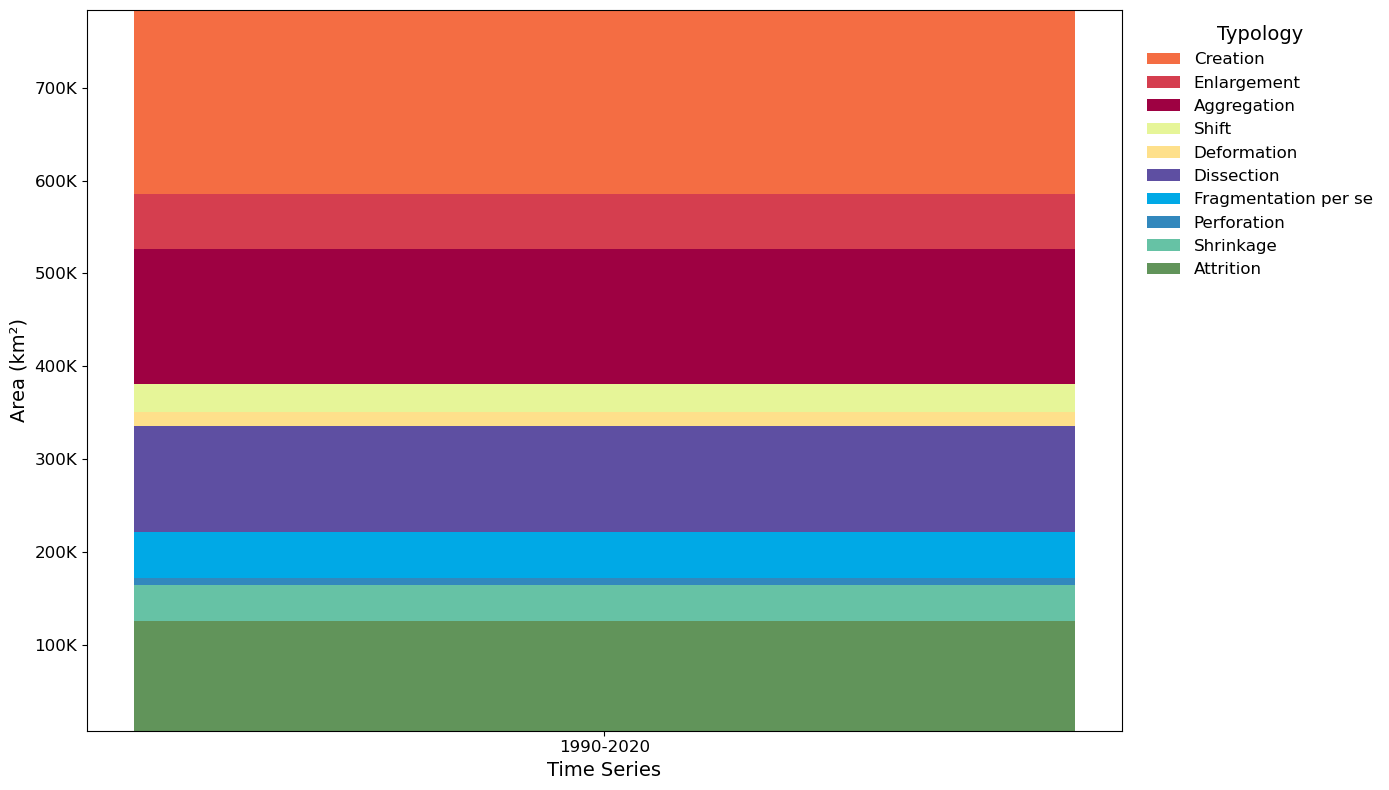

In [88]:
# time series 
df = pd.read_excel('/home/gisuser/code/code/data/typology_grapgh_data.xlsx', index_col=0)
if 'TS_km2' in df.columns:
    df = df[['TS_km2']]
    
colors = {
    "aggregation": "#9E0142",
    "attrition": "#61945A",
    "creation": "#F46D43",
    "dissection": "#5E4FA2",
    "frag per se": "#00A9E6",
    "shrinkage": "#66C2A5",
    "perforation": "#3288BD",
    "enlargement": "#D53E4F",
    "shift": "#E6F598",
    "deformation": "#FEE08B"
}

legend_labels = {
    "aggregation": "Aggregation",
    "attrition": "Attrition",
    "creation": "Creation",
    "dissection": "Dissection",
    "frag per se": "Fragmentation per se",
    "shrinkage": "Shrinkage",
    "perforation": "Perforation",
    "enlargement": "Enlargement",
    "shift": "Shift",
    "deformation": "Deformation"
}

typology_order = [
    "attrition", "shrinkage", "perforation", "frag per se", "dissection",
    "deformation", "shift", 
    "aggregation", "enlargement", "creation", 
    
]

time_points = df.columns.tolist()

custom_x_labels = [
    "1990-2020"
]

fig, ax = plt.subplots(figsize=(14, 8))

bottom = [0] * len(time_points)
for typ in typology_order:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(
            range(len(time_points)),
            data,
            bottom=bottom,
            color=colors.get(typ, "#cccccc"),
            edgecolor='none',
            width=1.0,
            label=legend_labels.get(typ, typ)
        )
        bottom = [bottom[i] + data[i] for i in range(len(data))]

ax.set_xlabel('Time Series', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(df.values.min(), df.sum().max())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
#ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0.05, y=0.05)
# Create legend in typology_order



ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', reverse=True, frameon=False, fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()
